# Thoth
-------
In Bayesian analysis, priors are needed. Prior define the belief - defined as a probability function - about parameters before any analysis. For this model we require, for mathematical closure a prior for the initial activity 230Th to 232Th ratio - ($^{230}$Th/$^{232}$Th)$_{A0}$. The most common choice for this value is $\sim$ 0.8. This is the bulk earth composition of the upper continental crust (Wedepohl, 1995). However, there are two issues with this choice: (1) This assumes a homogeneous initial composition throughout the speleothem, and (2) that this is a reasonable estimate of the initial composition. 

It is clear from the literature that $^{230}$Th/$^{232}$Th)$_{A0}$ is variable - Faraji et al. (2021), Huang et al. (2024), Beck et al. (2001), Hoffman et al. (2010), Moseley et al. (2015), Fensterer et al. (2013), Warken et al. (2020), Schorndorf et al. (2023). This is not meant to be an exhaustive list but shows that there is a reasonable collection of literature showing that $^{230}$Th/$^{232}$Th)$_{A0}$ is highly varible and potential heterogeneous throughout a given sample. 


## So then the question becomes what is the most reasonable prior to describe the initial thorium composition of any given samples?
- One option would be to just use a uniform prior between 0 and some upper value (maybe > 100). 
- However, we construct a pseudo "prior". We call it this because it does not adhere to the traditional Bayesian rules as we construct a prior using the data. What we are trying to do is to maximise the information avaliable from the data whilst keeping the flexibility.  
- In the IBIS model framework we use a functionality which we term Thoth (Thorium-0-thorium) to dermine a non-parametric distribution describing the initial thorium composition of the speleothem.
- We choose this because if a uniform distribution is the optimum prior Thoth will return a uniform-like distribution. So this becomes a "one-size-fits-all" type approach to this problem

## How Thoth Works
-------------------
Thoth is the Monte Carlo functionality of the model that constructs the prior for ($^{230}$Th/$^{232}$Th)$_{A0}$ for the model. Like Hellstrom (2006), we generate initial 230Th0 via a log-uniform draw with an expanded range between 0 and 200. For each candidate, a relative uncertainty was sampled uniformly between 0.1 and 50% (1$\sigma$). We run this part of the code in batches of 1000 samples and determine for each candidate if it satisfies the criteria and is saved or fails and is discarded. If no candidates survive two consecutive batches (2000 unique samples), the tolerance of the premises is lowered. This relaxation is achieved by lowering the likelihood threshold required to satisfy the constraints. This approach is applied to segments of the data in sets of four samples, i = 0 to i = 3, followed by i = 1 to i = 4, up to i = N-4 to i = N. We break the data into these segments to allow for increased flexibility allowing for the identication of heterogenity if required. This approach continues until the max number of trials (5 $\times$ 10$^{6}$ batches) or the desired number of 1000 samples per data segment is reached. We then construct a non-parametric Kernel Density Estimate (KDE) using the combined candidate values and their 1$\sigma$ uncertainties from each data segment. Firstly, we perform a resampling for each candidate generating 5000 values, these are flattened into a single 1-D array and restricted to positive values (the positivity constraint is necessary as some of the values from the re-sampling can potentially be negative). A KDE is then fitted to these pooled sampling using Silverman’s rule (Silverman, 1984). The KDE is then evaluated over a uniform grid range and normalized to enforce a true probability density. For more rapid likelihood evaluations, the normalized densities are wrapped in an interpolation function. 



## Faraji Example
-----------------
In this jupyer notebook we show an example of a young <400 year old speleothem from tropical pacific documented by Faraji et al. (2021). This dataset provides a unique opportunity for validation as there is an accompanying laminae counting age model. Faraji et al. (2021) assume the accuracy of the age model and back-calculate the ($^{230}$Th/$^{232}$Th)$_{A0}$ required to align both the U-Th ages and lamina counting chronology. The authors report a set of unique sample specific ($^{230}$Th/$^{232}$Th)$_{A0}$ for each of the 10 measured U-Th samples from the Speleothem. Here we use ThoTh to examine if we can reutrn a prior that captures the variable and also m

### References
--------------

Hoffmann, D.L., Beck, J.W., Richards, D.A., Smart, P.L., Singarayer, J.S., Ketchmark, T. and Hawkesworth, C.J., 2010. Towards radiocarbon calibration beyond 28 ka using speleothems from the Bahamas. Earth and Planetary Science Letters, 289(1-2), pp.1-10.

Beck, J.W., Richards, D.A., Lawrence, R., Silverman, B.W., Smart, P.L., Donahue, D.J., Hererra-Osterheld, S., Burr, G.S., Calsoyas, L., Timothy, A.J. and Jull, 2001. Extremely large variations of atmospheric 14C concentration during the last glacial period. Science, 292(5526), pp.2453-2458.

Huang, S., Cai, Y., Cheng, H., Xue, G., Cheng, X., He, M., Li, R., Ma, L., Wei, Y., Lu, Y. and Yang, L., 2024. An integrated study of constraining the initial 230Th of a stalagmite and its implications. Quaternary Geochronology, 80, p.101497.

Faraji, M., Borsato, A., Frisia, S., Hellstrom, J.C., Lorrey, A., Hartland, A., Greig, A. and Mattey, D.P., 2021. Accurate dating of stalagmites from low seasonal contrast tropical Pacific climate using Sr 2D maps, fabrics and annual hydrological cycles. Scientific Reports, 11(1), p.2178.

Fensterer, C., Scholz, D., Hoffmann, D.L., Spötl, C., Schröder-Ritzrau, A., Horn, C., Pajon, J.M. and Mangini, A., 2013. Millennial-scale climate variability during the last 12.5 ka recorded in a Caribbean speleothem. Earth and Planetary Science Letters, 361, pp.143-151.

Schorndorf, N., Frank, N., Ritter, S.M., Warken, S.F., Scholz, C., Keppler, F., Scholz, D., Weber, M., Aviles Olguin, J. and Stinnesbeck, W., 2023. Mid-to late Holocene sea-level rise recorded in Hells Bells 234U/238U ratio and geochemical composition. Scientific Reports, 13(1), p.10011.

Warken, S.F., Vieten, R., Winter, A., Spötl, C., Miller, T.E., Jochum, K.P., Schröder‐Ritzrau, A., Mangini, A. and Scholz, D., 2020. Persistent link between Caribbean precipitation and Atlantic Ocean circulation during the Last Glacial revealed by a speleothem record from Puerto Rico. Paleoceanography and Paleoclimatology, 35(11), p.e2020PA003944.

Moseley, G.E., Richards, D.A., Smart, P.L., Standish, C.D., Hoffmann, D.L., ten Hove, H. and Vinn, O., 2015. Early–middle Holocene relative sea-level oscillation events recorded in a submerged speleothem from the Yucatán Peninsula, Mexico. The Holocene, 25(9), pp.1511-1521.


In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import pandas as pd
import glob
import os 
mpl.rcParams['font.size'] = 12


# Prior

In [7]:
def Get_Prior_Data(file_pattern, target_directory = f'{filepath}/Initial Thorium '): 
    file_pattern = os.path.join(target_directory, file_pattern)
    pickle_files = glob.glob(file_pattern)
    N = len(pickle_files)
    data = []
    # Loop through each file, open it, and load the pickled data.
    for file_path in pickle_files:
        try:
            with open(file_path, 'rb') as f:
                data.append(pickle.load(f))
            #print(f"Loaded data from {file_path}:")
            # Process the data as needed, for example, print a summary.
            #print(f"Type: {type(data)}; Data snippet: {str(data)[:200]}...\n")
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

    return data

In [9]:
data_faraji2021 = Get_Prior_Data("Faraji_Case_Study_Prior")


In [14]:
Faraji_Th = np.array([8.05, 6.00, 5.98, 6.63, 7.74, 6.55, 6.01, 6.21, 6.87, 4.88])
Faraji_Th_err = np.array([0.24, 0.25, 0.27, 0.25, 0.18, 0.21, 0.50, 0.46, 0.27, 0.97])

In [15]:
boots = []
for i in range(len(Faraji_Th)): 
    y = np.random.normal(Faraji_Th[i], Faraji_Th_err[i], 10000)
    boots.append(y)

In [16]:
from scipy.stats import gaussian_kde
kde_faraji = gaussian_kde(np.array(boots).flatten())

Text(0, 0.5, 'Density')

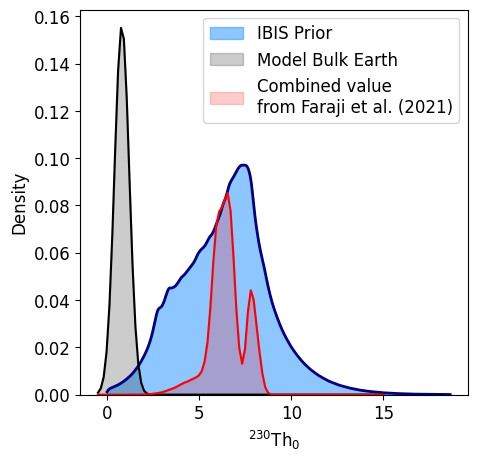

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (5,5))
ax.plot(data_faraji2021[0].x, data_faraji2021[0].y/2, color = 'navy', lw = 2)
ax.fill_between(data_faraji2021[0].x, data_faraji2021[0].y/2, color = 'dodgerblue', alpha = 0.5, 
                   label = 'IBIS Prior')

x = np.linspace(-.5, 15, 100)
ax.plot(x, norm(loc = 0.8, scale = 0.4).pdf(x)/ norm(loc = 0.8, scale = 0.4).pdf(x).sum(), 
       color = 'k')
ax.fill_between(x, norm(loc = 0.8, scale = 0.4).pdf(x)/ norm(loc = 0.8, scale = 0.4).pdf(x).sum(), 
       color = 'k', alpha = 0.2, label = 'Model Bulk Earth')


ax.plot(x, kde_faraji(x)/kde_faraji(x).sum(),
       color = 'r')
ax.fill_between(x, kde_faraji(x)/kde_faraji(x).sum(),
       color = 'r', alpha = 0.2, label = 'Combined value\nfrom Faraji et al. (2021)')


ax.legend()
ax.set_ylim(bottom = 0.0)
ax.set_xlabel('$^{230}$Th$_{0}$')
ax.set_ylabel('Density')